In [113]:
pip install numpy pandas sklearn

Note: you may need to restart the kernel to use updated packages.


In [114]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns


In [115]:
df = pd.read_csv('data/news.csv')

df.head()


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [116]:
print(df.shape)

(6335, 4)


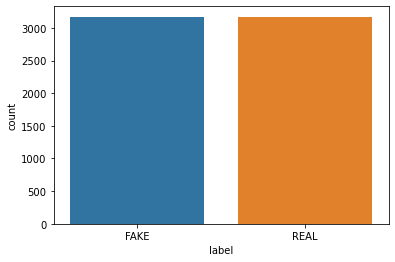

In [117]:
sns.countplot(x= 'label', data = df)

plt.show()

In [118]:
df['numeric_label'] = df['label'].apply(lambda x: 0 if x == 'FAKE' else 1)
df

,Unnamed: 0,title,text,label,numeric_label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1
...,...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,1
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,0
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,0
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,1


In [119]:
Y = df['numeric_label']
X = df.drop(['label','numeric_label'], axis=1)

In [120]:
class PassiveAgressiveModel:
    def __init__(self, max_iter):
        self.model = PassiveAggressiveClassifier(max_iter=max_iter)

    def train(self, X, Y):
        self.model.fit(X, Y)

    def predict(self, x_test):
        return self.model.predict(x_test)
        


In [121]:
x_train, x_test, y_train,y_test = train_test_split(X['text'], Y, test_size=0.7, random_state=7)

In [122]:
tfidf_vector = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vector.fit_transform(x_train)
tfidf_test = tfidf_vector.transform(x_test)

In [139]:
model = PassiveAgressiveModel(max_iter=1000)

In [140]:
model.train(tfidf_train,y_train)

In [141]:
y_pred = model.predict(tfidf_test)


In [142]:
score = accuracy_score(y_test, y_pred)
print(f'Accuracy Score : {round(100 * score,2)}%')

Accuracy Score : 92.04%
